Clasification

[Dataset Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)

In [1]:
!python --version

Python 3.10.12


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/dataset_kaggle'


In [2]:
%cd /content/drive/MyDrive/dataset_kaggle

/content/drive/MyDrive/dataset_kaggle


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:23<00:00, 122MB/s] 
100% 2.29G/2.29G [00:23<00:00, 106MB/s]


In [5]:
!mv chest-xray-pneumonia.zip dataset

In [5]:
%cd /content/drive/MyDrive/dataset_kaggle/dataset

/content/drive/MyDrive/dataset_kaggle/dataset


In [6]:
!unzip chest-xray-pneumonia.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpe

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Definir rutas de los conjuntos de datos
train_dir = '/content/drive/MyDrive/dataset_kaggle/dataset/chest_xray/train'
test_dir = '/content/drive/MyDrive/dataset_kaggle/dataset/chest_xray/test'

# Parámetros de entrenamiento
batch_size = 32
epochs = 10
image_size = (150, 150)

# Preprocesamiento y aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 111s 600ms/step - loss: 0.4823 - accuracy: 0.7734 - val_loss: 0.5699 - val_accuracy: 0.7533
Epoch 2/10
163/163 [==============================] - 100s 612ms/step - loss: 0.3530 - accuracy: 0.8482 - val_loss: 0.4493 - val_accuracy: 0.7434
Epoch 3/10
163/163 [==============================] - 97s 593ms/step - loss: 0.2560 - accuracy: 0.8919 - val_loss: 0.3965 - val_accuracy: 0.8322
Epoch 4/10
163/163 [==============================] - 96s 589ms/step - loss: 0.2270 - accuracy: 0.9020 - val_loss: 0.3050 - val_accuracy: 0.8799
Epoch 5/10
163/163 [==============================] - 100s 613ms/step - loss: 0.2201 - accuracy: 0.9107 - val_loss: 0.2680 - val_accuracy: 0.8980
Epoch 6/10
163/163 [==============================] - 91s 556ms/step - loss: 0.2137 - accuracy: 0.9135 - val_loss: 0.3245 - val_accuracy: 0.8651
Epoch 7/10
163/163 [========================

In [9]:
# Guardar el modelo en formato .h5
model.save('pneumonia_classifier.h5')

# Cargar el modelo guardado
loaded_model = tf.keras.models.load_model('pneumonia_classifier.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Guardar el modelo TensorFlow Lite en un archivo .tflite
with open('pneumonia_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

20/20 - 14s - loss: 0.2965 - accuracy: 0.8750 - 14s/epoch - 677ms/step

Test accuracy: 0.875


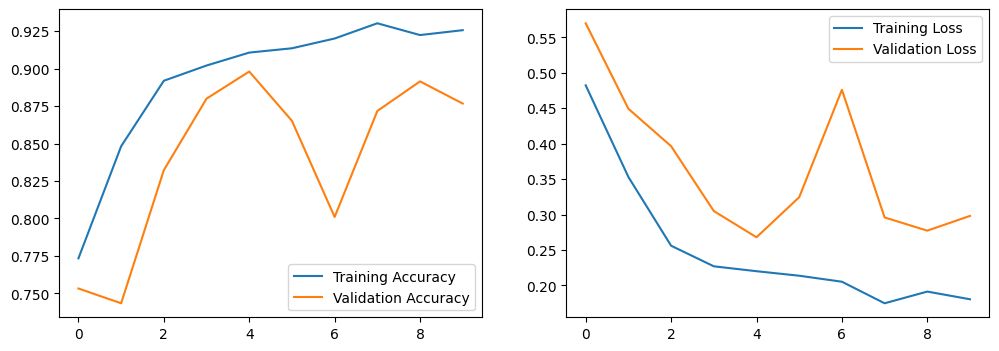

In [10]:

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

# Graficar la precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step


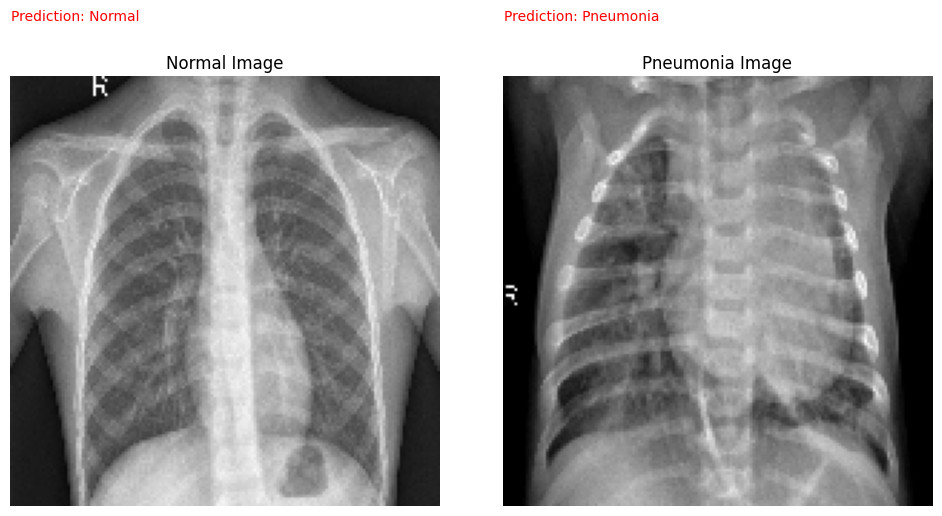

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

# Cargar el modelo guardado
loaded_model = tf.keras.models.load_model('pneumonia_classifier.h5')

# Rutas de ejemplo para imágenes de prueba
normal_image_path = '/content/drive/MyDrive/dataset_kaggle/dataset/chest_xray/test/NORMAL/IM-0001-0001.jpeg'
pneumonia_image_path = '/content/drive/MyDrive/dataset_kaggle/dataset/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'

# Cargar y preprocesar imágenes de prueba
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

normal_img = preprocess_image(normal_image_path)
pneumonia_img = preprocess_image(pneumonia_image_path)

# Realizar predicciones
normal_pred = loaded_model.predict(normal_img)
pneumonia_pred = loaded_model.predict(pneumonia_img)

# Mostrar las imágenes y resultados de predicción
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(load_img(normal_image_path, target_size=(150, 150)))
plt.title('Normal Image')
plt.axis('off')
pred_label = 'Normal' if normal_pred[0][0] < 0.5 else 'Pneumonia'
plt.text(0, -20, f'Prediction: {pred_label}', color='r')

plt.subplot(1, 2, 2)
plt.imshow(load_img(pneumonia_image_path, target_size=(150, 150)))
plt.title('Pneumonia Image')
plt.axis('off')
pred_label = 'Normal' if pneumonia_pred[0][0] < 0.5 else 'Pneumonia'
plt.text(0, -20, f'Prediction: {pred_label}', color='r')

plt.tight_layout()
plt.show()


Found 624 images belonging to 2 classes.
20/20 [==============================] - 5s 245ms/step


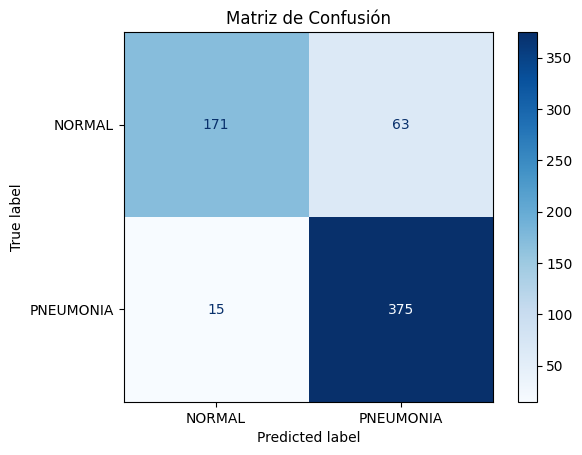

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
loaded_model = load_model('pneumonia_classifier.h5')

# Directorio del conjunto de prueba
test_dir = '/content/drive/MyDrive/dataset_kaggle/dataset/chest_xray/test'

# Parámetros
batch_size = 32
image_size = (150, 150)

# Preprocesamiento de datos de prueba
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Realizar predicciones en el conjunto de prueba
y_true = test_generator.classes
num_samples = len(y_true)
num_steps = np.ceil(num_samples / batch_size)
y_pred = loaded_model.predict(test_generator, steps=num_steps)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred > 0.5)

# Clases
class_names = test_generator.class_indices

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='.0f')

plt.title('Matriz de Confusión')
plt.show()


In [15]:
!pip freeze > requirements.txt